# Importimi i librarive

In [1]:
import re
import sys
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

# Leximi i datasetit

In [2]:
#Importimi i datasetit
data_file = pd.read_csv("googleplaystore.csv")

In [3]:
#Shohim madhësinë e datasetit
print(data_file.shape)

(10841, 13)


In [4]:
#Informata mbi atributet e datasetit
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Pastrimi i të dhënave

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

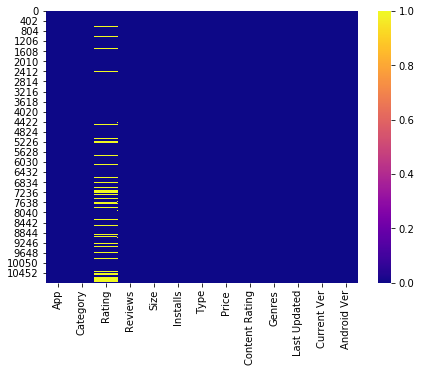

In [5]:
#Kontrollojmë për atributet që kanë vlera null
plt.figure(figsize=(7, 5))
sns.heatmap(data_file.isnull(), cmap='plasma')
data_file.isnull().any()

In [6]:
#Kontrollojmë totalin e rekordeve me vlerë null për secilin atribut
data_file.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
#Radhitim atributet sipas numrit të vlerave null dhe shohim se atributi Rating ka më së shumti vlera të tilla
total = data_file.isnull().sum().sort_values(ascending=False)
percent = (data_file.isnull().sum()/data_file.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092


In [8]:
#Mbushim vlerat null të rekordeve përkatëse të atributit Rating me medianën e vlerave
data_file['Rating'] = data_file['Rating'].fillna(data_file['Rating'].median())
data_file.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [9]:
#Kontrollojmë totalin e rekordeve me vlerë null për secilin atribut
data_file.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [10]:
#Meqë numri i vlerave null për atributet tjera është shumë i vogël atëherë vedosim ti fshijmë ato 
data_file.dropna(how ='any', inplace = True)

In [11]:
#Kontrollojmë totalin e rekordeve me vlerë null për secilin atribut
data_file.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
#Shohim madhësinë e datasetit pas pastrimit të vlerave null
data_file.shape

(10829, 13)

In [13]:
#Shohim të dhëna të rëndësishme për atribute numerike e të tillë e kemi vetëm atributin Rating
data_file.describe()

,Rating
count,10829.000000
mean,4.206510
std,0.480467
min,1.000000
25%,4.100000
50%,4.300000
75%,4.500000
max,5.000000


In [14]:
#Duhet te behen disa ndryshime te atributeve me qëllim të pastrimit
data_file['Installs'] = data_file['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
data_file['Installs'] = data_file['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
data_file['Installs'] = data_file['Installs'].apply(lambda x: int(x))

data_file['Reviews'] = data_file['Reviews'].apply(lambda x: int(x))


data_file['Size'] = data_file['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data_file['Size'] = data_file['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
data_file['Size'] = data_file['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

data_file['Installs'] = data_file['Installs'].apply(lambda x: float(x))

data_file['Price'] = data_file['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
data_file['Price'] = data_file['Price'].apply(lambda x: float(x))

Text(0.5, 1.0, 'Shpërndarja e Rating-ut')

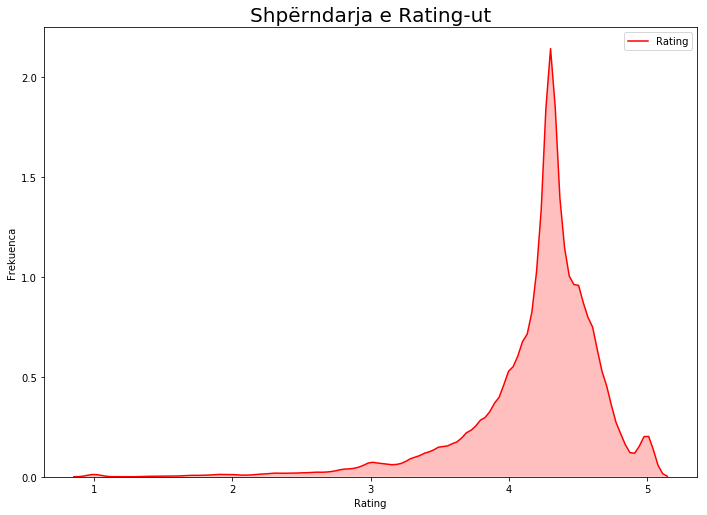

In [15]:
#Shikojmë shpërndarjen e vlerave të atributit Rating
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data_file.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frekuenca")
plt.title('Shpërndarja e Rating-ut',size = 20)

In [16]:
#Kontrollojmë nëse ka anomali në vlerat për atributin Rating
(data_file['Rating']>5.0).sum()
i = data_file[data_file['Rating'] > 5.0].index
data_file.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [17]:
#Atributet me vlerë për Rating më të madhe se 5 fshihen meqë një vlerë e tillë nuk duhet të ekzistojë dhe paraqet anomali
data_file = data_file.drop(i)

In [18]:
#Shohim formatin e të dhënave pas pastrimit
data_file.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


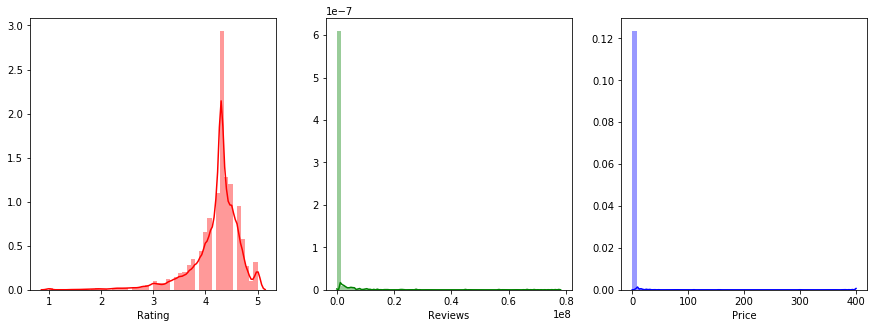

In [19]:
#Shohim shpërndarjen e Rating, Reviews dhe Price. Shihet se vlerat për Reviews anojnë kah zero, njësoj edhe për Price meqë
#shumica e aplikacioneve janë pa pagesë
f,(ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=False)
sns.distplot(data_file['Rating'],hist=True,color='r',ax=ax1)
sns.distplot(data_file['Reviews'],hist=True,color='g',ax=ax2)
sns.distplot(data_file['Price'],hist=True,color='b',ax=ax3)
f.set_size_inches(15, 5)

Text(0.5, 1.0, 'Numri i aplikacioneve për kategori')

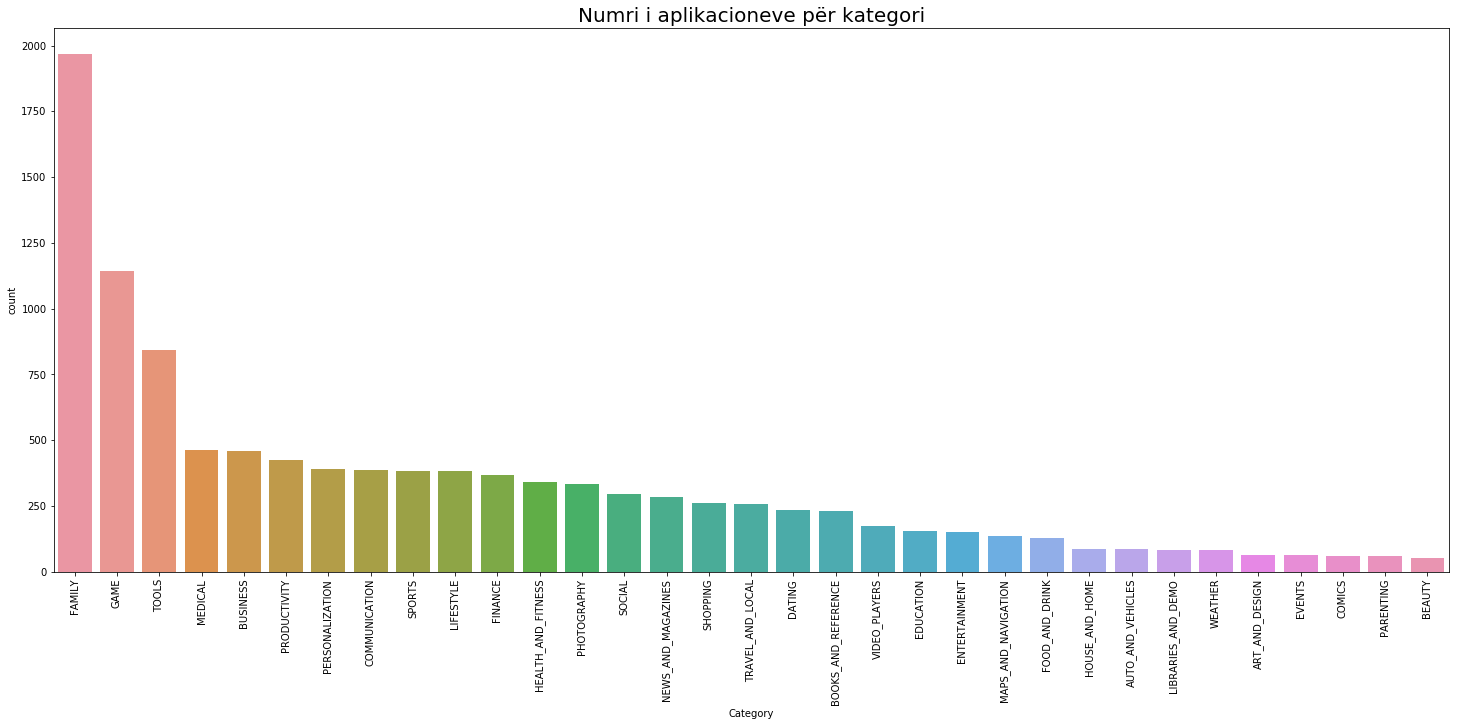

In [20]:
#Shikojmë numrin e aplikacioneve ekzistuese për kategori
f,ax1 = plt.subplots(ncols=1)
sns.countplot("Category", data=data_file,ax=ax1,order=data_file['Category'].value_counts().index)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
f.set_size_inches(25,10)
ax1.set_title("Numri i aplikacioneve për kategori",size = 20)

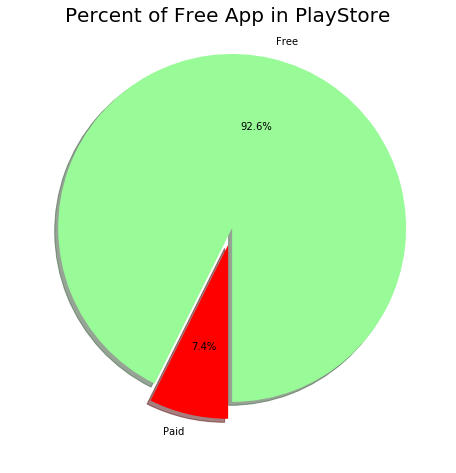

In [21]:
#Shikojmë vlerat e atributit Tybe dhe shohim se shumë pak aplikacione janë me pagesë

labels =data_file['Type'].value_counts(sort = True).index
sizes = data_file['Type'].value_counts(sort = True)


colors = ["palegreen","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in PlayStore',size = 20)
plt.show()

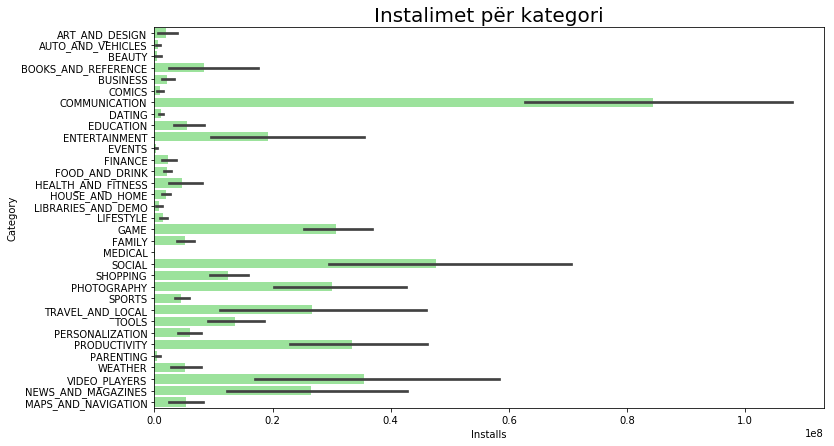

In [23]:
#Shikojmë numrin e instalimeve për kategori dhe shohim se më së shumti përdoren aplikacionet për komunikim
fig = plt.figure(figsize=(12,7))
title=plt.title('Instalimet për kategori',size=20)
bar=sns.barplot(y=data_file['Category'],x=data_file['Installs'], color='lightgreen')
plt.show(bar)

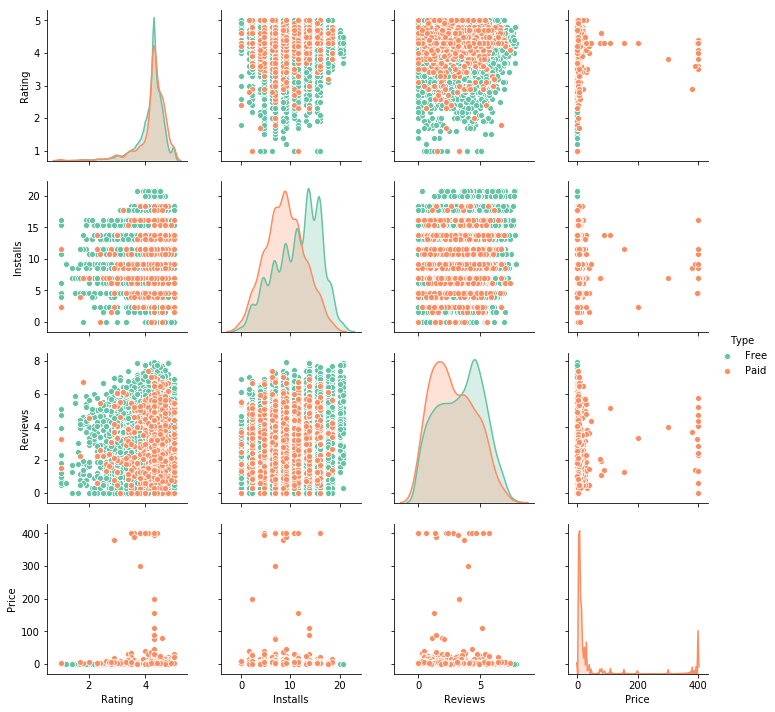

In [24]:
#Shohim varshmërinë e atributeve me njëra tjetrën
x = data_file['Rating'].dropna()
y = data_file['Size'].dropna()
z = data_file['Installs'][data_file.Installs!=0].dropna()
p = data_file['Reviews'][data_file.Reviews!=0].dropna()
t = data_file['Type'].dropna()
price = data_file['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

Text(0, 0.5, 'Nr. i aplikacioneve')

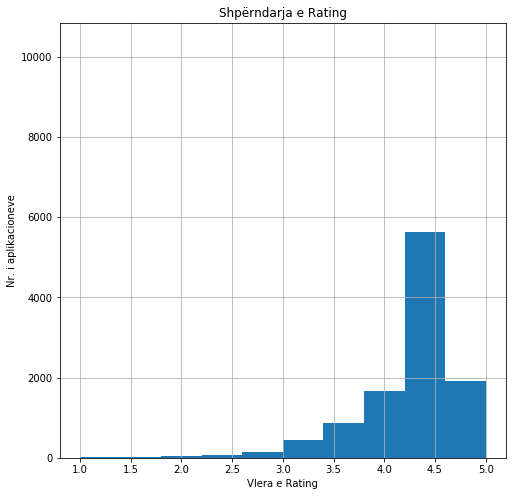

In [25]:
#Shohim konvergjencën e vlerave për atributin Rating
data_file.hist(column='Rating')
plt.ylim(0,10841)
plt.title("Shpërndarja e Rating")
plt.xlabel("Vlera e Rating")
plt.ylabel("Nr. i aplikacioneve")

In [26]:
#Enkodimi i atributit App
le = preprocessing.LabelEncoder()
data_file['App'] = le.fit_transform(data_file['App'])
data_file

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,6955,ART_AND_DESIGN,4.1,159,19,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,2630,ART_AND_DESIGN,3.9,967,14,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,8648,ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,7819,ART_AND_DESIGN,4.5,215644,25,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,7014,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,6871,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,7872,ART_AND_DESIGN,3.8,178,19,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,5374,ART_AND_DESIGN,4.1,36815,29,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,4800,ART_AND_DESIGN,4.4,13791,33,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,5587,ART_AND_DESIGN,4.7,121,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [27]:
# Enkodimi i atributit Category
category_list = data_file['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
data_file = pd.concat([data_file, pd.get_dummies(data_file['Category'], prefix='cat')], axis=1)
data_file

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,6955,ART_AND_DESIGN,4.1,159,19,10000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
1,2630,ART_AND_DESIGN,3.9,967,14,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,...,0,0,0,0,0,0,0,0,0,0
2,8648,ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
3,7819,ART_AND_DESIGN,4.5,215644,25,50000000.0,Free,0.0,Teen,Art & Design,...,0,0,0,0,0,0,0,0,0,0
4,7014,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,0
5,6871,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
6,7872,ART_AND_DESIGN,3.8,178,19,50000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
7,5374,ART_AND_DESIGN,4.1,36815,29,1000000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
8,4800,ART_AND_DESIGN,4.4,13791,33,1000000.0,Free,0.0,Everyone,Art & Design,...,0,0,0,0,0,0,0,0,0,0
9,5587,ART_AND_DESIGN,4.7,121,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Enkodimi i atributit Genre
le = preprocessing.LabelEncoder()
data_file['Genres'] = le.fit_transform(data_file['Genres'])
data_file

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,6955,ART_AND_DESIGN,4.1,159,19,10000.0,Free,0.0,Everyone,9,...,0,0,0,0,0,0,0,0,0,0
1,2630,ART_AND_DESIGN,3.9,967,14,500000.0,Free,0.0,Everyone,12,...,0,0,0,0,0,0,0,0,0,0
2,8648,ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,9,...,0,0,0,0,0,0,0,0,0,0
3,7819,ART_AND_DESIGN,4.5,215644,25,50000000.0,Free,0.0,Teen,9,...,0,0,0,0,0,0,0,0,0,0
4,7014,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,11,...,0,0,0,0,0,0,0,0,0,0
5,6871,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,9,...,0,0,0,0,0,0,0,0,0,0
6,7872,ART_AND_DESIGN,3.8,178,19,50000.0,Free,0.0,Everyone,9,...,0,0,0,0,0,0,0,0,0,0
7,5374,ART_AND_DESIGN,4.1,36815,29,1000000.0,Free,0.0,Everyone,9,...,0,0,0,0,0,0,0,0,0,0
8,4800,ART_AND_DESIGN,4.4,13791,33,1000000.0,Free,0.0,Everyone,9,...,0,0,0,0,0,0,0,0,0,0
9,5587,ART_AND_DESIGN,4.7,121,3.1,10000.0,Free,0.0,Everyone,11,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Enkodimi i atributit Content Rating 
le = preprocessing.LabelEncoder()
data_file['Content Rating'] = le.fit_transform(data_file['Content Rating'])
data_file.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,6955,ART_AND_DESIGN,4.1,159,19,10000.0,Free,0.0,1,9,...,0,0,0,0,0,0,0,0,0,0
1,2630,ART_AND_DESIGN,3.9,967,14,500000.0,Free,0.0,1,12,...,0,0,0,0,0,0,0,0,0,0
2,8648,ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,1,9,...,0,0,0,0,0,0,0,0,0,0
3,7819,ART_AND_DESIGN,4.5,215644,25,50000000.0,Free,0.0,4,9,...,0,0,0,0,0,0,0,0,0,0
4,7014,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,1,11,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Enkodimi i atributit Type
data_file['Type'] = pd.get_dummies(data_file['Type'])
data_file.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,6955,ART_AND_DESIGN,4.1,159,19,10000.0,1,0.0,1,9,...,0,0,0,0,0,0,0,0,0,0
1,2630,ART_AND_DESIGN,3.9,967,14,500000.0,1,0.0,1,12,...,0,0,0,0,0,0,0,0,0,0
2,8648,ART_AND_DESIGN,4.7,87510,8.7,5000000.0,1,0.0,1,9,...,0,0,0,0,0,0,0,0,0,0
3,7819,ART_AND_DESIGN,4.5,215644,25,50000000.0,1,0.0,4,9,...,0,0,0,0,0,0,0,0,0,0
4,7014,ART_AND_DESIGN,4.3,967,2.8,100000.0,1,0.0,1,11,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Enkodimi i atributit Last Updated 
data_file['Last Updated'] = data_file['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))
data_file['Last Updated'].head()

0    1.515280e+09
1    1.515971e+09
2    1.533074e+09
3    1.528409e+09
4    1.529446e+09
Name: Last Updated, dtype: float64

In [32]:
# Enkodimi i atributit Size
data_file[data_file['Size'] == 'Varies with device'] = 0
data_file['Size'] = data_file['Size'].astype(float)

In [33]:
#Mbushja e vlerave null të atributit Size me vlerën mesatare të të gjitha vlerave ekzistuese
data_file['Size'] = data_file['Size'].fillna(data_file['Size'].mean())

In [34]:
#Mbushja e vlerave null, largimi i simboleve speciale dhe validimi i vlerave të atributit Current Ver
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
	data_file['Current Ver'] = data_file['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
	data_file['Current Ver'] = data_file['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

data_file['Current Ver'] = data_file['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '')
                                                                      .replace(',', '.',1)).astype(float)
data_file['Current Ver'] = data_file['Current Ver'].fillna(data_file['Current Ver'].median())

In [35]:
# Ndarja e të dhënave në të dhëna trajnuese dhe testuese
features = ['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
features.extend(category_list)
X = data_file[features]
y = data_file['Rating']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [37]:
#Importimi i algoritmit SVM
from sklearn import svm

In [38]:
#Trajnimi i algoritmit
model = svm.SVR(kernel = 'rbf')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
#Saktësia e algoritmit
model.score(X_test, y_test)

0.9157858858564019

In [40]:
#Vlerat e predikuara nga algoritmi SVM
Y_out=model.predict(X_test)
print(Y_out)

[4.184551 4.184551 4.184551 ... 4.184551 4.184551 4.184551]


In [41]:
#Krahasimi i vlerës së predikuar nga algoritmi SVM për atributin Rating me vlerën aktuale të tij nga të dhënat testuese
for x,y in zip(Y_out,y_test):
    print(f"Predicted:{round(x,1)}     Actual:{y}")

Predicted:4.2     Actual:4.2
Predicted:4.2     Actual:4.2
Predicted:4.2     Actual:4.3
Predicted:4.2     Actual:4.1
Predicted:4.2     Actual:3.9
Predicted:4.2     Actual:4.4
Predicted:4.2     Actual:4.6
Predicted:4.2     Actual:4.0
Predicted:4.2     Actual:4.2
Predicted:4.2     Actual:4.6
Predicted:4.2     Actual:3.9
Predicted:4.2     Actual:3.0
Predicted:4.2     Actual:4.4
Predicted:4.2     Actual:4.1
Predicted:4.2     Actual:4.6
Predicted:4.2     Actual:4.2
Predicted:4.2     Actual:4.9
Predicted:4.5     Actual:4.6
Predicted:4.2     Actual:4.3
Predicted:4.2     Actual:4.2
Predicted:4.2     Actual:4.2
Predicted:0.1     Actual:0.0
Predicted:4.2     Actual:4.3
Predicted:4.2     Actual:3.9
Predicted:4.2     Actual:4.3
Predicted:0.1     Actual:0.0
Predicted:4.2     Actual:4.2
Predicted:4.2     Actual:4.3
Predicted:4.2     Actual:2.3
Predicted:0.1     Actual:0.0
Predicted:4.2     Actual:4.4
Predicted:4.2     Actual:3.0
Predicted:4.2     Actual:4.1
Predicted:4.2     Actual:3.7
Predicted:0.1 

In [42]:
#Mean absolute percentage error
mape_sum = 0
Y_out=model.predict(X_test)
for x,y in zip(y_test,Y_out):
        mape_sum += (abs(x - y)/y)
        
mape = mape_sum/len(y_test) *100

print(f"MAPE: {round(mape,2)}%")

MAPE: 22.45%


In [43]:
#Mean percentage error
mpe_sum = 0
Y_out=model.predict(X_test)
for x, y in zip(y_test, Y_out):
    mpe_sum += ((x - y)/x)
    
mpe = mpe_sum/len(y_test) *100

print(f"MPE: {round(mpe,2)}")

MPE: -inf


In [44]:
#Shkalla e gabimit
accurracy=model.score(X_test,y_test)
error=1-accurracy
error_percentage=error*100
print(f"Shkalla e gabimit në raport me saktësinë e algoritmit është {round(error_percentage,2)}%")

Shkalla e gabimit në raport me saktësinë e algoritmit është 8.42%


Text(0, 0.5, 'Nr. i aplikacioneve')

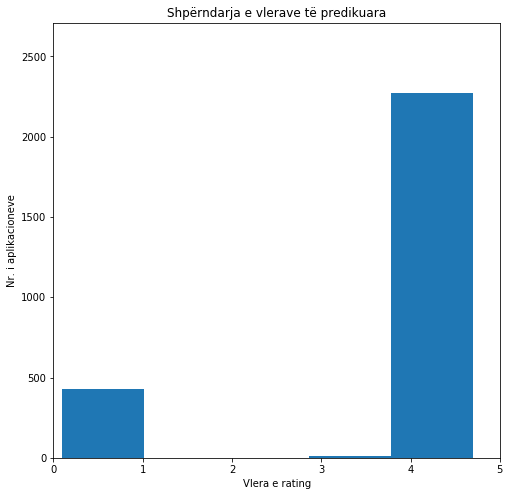

In [45]:
#Shohim konvergjencën e vlerave të predikuara për atributin Rating
plt.hist(Y_out,5)
plt.ylim(0,2708)
plt.xlim(0,5)
plt.title("Shpërndarja e vlerave të predikuara")
plt.xlabel("Vlera e rating")
plt.ylabel("Nr. i aplikacioneve")